In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
ground_truth = pd.read_csv('gender_submission.csv')


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode Sex and Embarked values to numerical form  
encoder = LabelEncoder()
encoder.fit(data['Sex']) 

embark_encoder = LabelEncoder()
embark_encoder.fit(data['Embarked'])

def encode(encoder, data):
    return encoder.transform(data)

In [6]:

# Preprocessing
def preprocessing(data):
    # Remove NaN value in Embarked 
    train_data = data.dropna(subset=["Embarked"], axis=0)
    
    train_data.loc[:, 'Cabin'] = np.where(train_data['Cabin'].isnull(), 0, 1)

    # Encode categorical features
    train_data.loc[:, 'Sex'] = encode(encoder, train_data['Sex'])
    train_data.loc[:, 'Embarked'] = encode(embark_encoder, train_data['Embarked'])
    
    #Encode with additional columns
    # train_data = train_data.join(pd.get_dummies(train_data["Sex"])).drop(columns="Sex")
    # train_data = train_data.join(pd.get_dummies(train_data["Embarked"])).drop(columns="Embarked")

    # Fill missing Age (with median)
    train_data.loc[:, 'Age'] = train_data["Age"].fillna(train_data.Age.median())

    return train_data

In [7]:
train_data = preprocessing(data)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,2


In [8]:
# Remove Feature with High Cardinality
high_cardinality_features = ['Name', "Ticket", "PassengerId"]

def remove_feature(data, features):
    # Remove unnecesary feature and dependent variable (y)
    train_data = data.drop(features, axis=1)
    return train_data

In [9]:
train_data = remove_feature(train_data, high_cardinality_features)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,2
1,1,1,0,38.0,1,0,71.2833,1,0
2,1,3,0,26.0,0,0,7.9250,0,2
3,1,1,0,35.0,1,0,53.1000,1,2
4,0,3,1,35.0,0,0,8.0500,0,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,2
887,1,1,0,19.0,0,0,30.0000,1,2
888,0,3,0,28.0,1,2,23.4500,0,2
889,1,1,1,26.0,0,0,30.0000,1,0


In [10]:
def plot_corr(corr):
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr, annot=True, cmap="YlGnBu")
    plt.title('Correlation between training data')

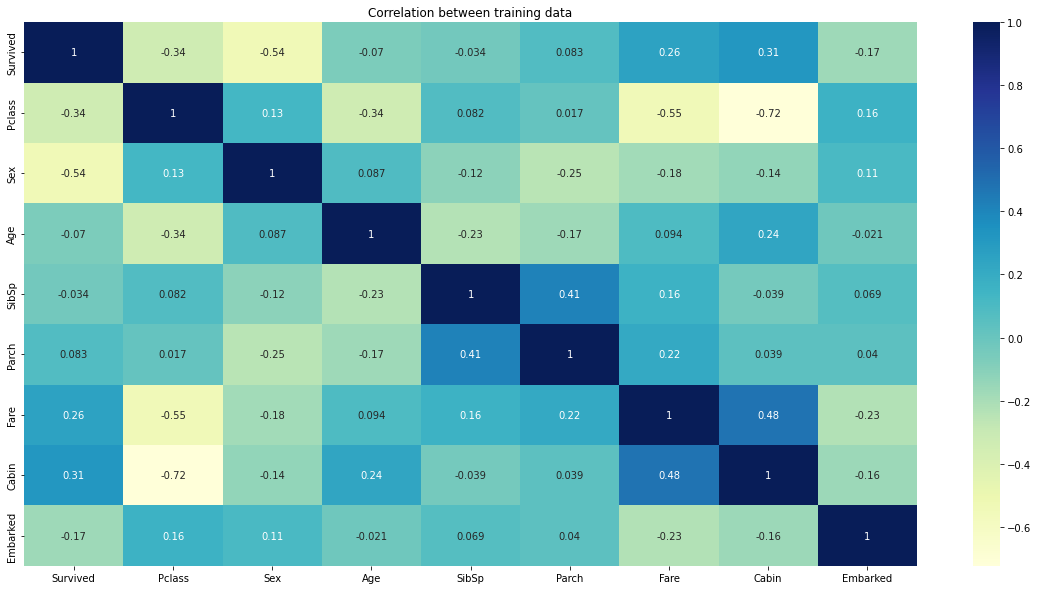

In [11]:
plot_corr(train_data.corr())

In [12]:
train_data.corr()['Survived'].sort_values()

Sex        -0.541585
Pclass     -0.335549
Embarked   -0.169718
Age        -0.069822
SibSp      -0.034040
Parch       0.083151
Fare        0.255290
Cabin       0.313435
Survived    1.000000
Name: Survived, dtype: float64

In [13]:
# Remove Features with Highest Correlation
discard_feature = ["Cabin", "Fare", "Parch"]
train_data = remove_feature(train_data, discard_feature)

In [14]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Embarked'], dtype='object')

In [15]:
x_train = train_data.drop(["Survived"], axis=1)
y_train = train_data['Survived']

In [16]:
#Train Model
from sklearn.linear_model import LogisticRegression

#1. Logistic Regression
logRes = LogisticRegression()
logRes.fit(x_train, y_train)

LogisticRegression()

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
x_test = preprocessing(test_data)

x_test.loc[:, 'Fare'] = x_test["Fare"].fillna(x_test["Fare"].mean())

x_test = remove_feature(x_test, high_cardinality_features + discard_feature)

In [19]:
y_test = logRes.predict(x_test)
y_true = np.array(ground_truth.Survived)

In [20]:
from sklearn.metrics import accuracy_score

def evaluate(y_true, y_test):
    score = accuracy_score(y_true, y_test)
    return score

logRes_score = evaluate(y_true, y_test)
logRes_score

0.930622009569378

In [21]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [22]:
dec_tree_pred = dec_tree.predict(x_test)

In [23]:
dec_tree_score = evaluate(y_true, dec_tree_pred)
dec_tree_score

0.9258373205741627

In [24]:
from sklearn.ensemble import RandomForestClassifier

rdn_for = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rdn_for.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [25]:
rdn_for_pred = rdn_for.predict(x_test)
rdn_for_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [26]:
rdn_for_score = evaluate(y_true, rdn_for_pred)
rdn_for_score

0.8995215311004785

In [27]:
def generate_output(data, y_pred):

    output_df = pd.DataFrame({
        'PassengerId' : data.PassengerId,
        'Survived' : y_pred
    })

    return output_df

In [28]:
output_1 = generate_output(test_data, y_test)
output_2 = generate_output(test_data, dec_tree_pred)
output_3 = generate_output(test_data, rdn_for_pred)

In [29]:
logRes_score, dec_tree_score, rdn_for_score

(0.930622009569378, 0.9258373205741627, 0.8995215311004785)

In [30]:
output_1.to_csv('submission.csv', index=False)